Example outputs

some imports and opening up our results file

In [6]:
import tutorialworkflowresult
import postprocess
import pandas as pd
result = tutorialworkflowresult.load_cached_workflowresult("results/qaoa-concentration-ccb37456-4211-43a9-949f-8f0de428e68d_workflow_result.json")


For a sanity check, we can look at the different task types in our result file

In [7]:
pd.Series(postprocess.count_tasks(result))

generate-random-parameters      18
evaluate-params                 36
get-graph-step                   6
find-appropriate-params-step    18
get-ansatz-step                  6
get-problem-hamiltonian-step     6
dtype: int64

Now we can recreate the tables from the paper

Let's first look at the graph size of 10

In [8]:
df = postprocess.build_table(result)
# A little pandas magic to match the table format of the paper
df = df.reorder_levels([1,3,2,0])  # set the index order to match paper
df = df.unstack(fill_value=0).unstack(fill_value=0).unstack(fill_value=0)  # do some unstacking to move index "above" our table

df[10]

high                         low                      random          \
        mean samples     stdev      mean samples     stdev      mean samples   
2 -10.768107    25.0  0.324172 -3.042503    25.0  0.226903 -5.361384    25.0   
3 -11.564505    25.0  0.232011 -1.756597    25.0  0.197124 -8.515193    25.0   
4 -11.372673    25.0  0.415371 -1.359470    25.0  0.139563 -7.751085    25.0   
5 -11.998578    25.0  0.392505 -1.425188    25.0  0.057822 -7.263215    25.0   
6 -12.041428    25.0  0.404073 -1.085160    25.0  0.111601 -6.588989    25.0   
7 -12.400830    25.0  0.338455 -0.384711    25.0  0.054250 -6.248302    25.0   

             
      stdev  
2  0.029310  
3  0.237816  
4  0.128166  
5  0.430749  
6  0.142111  
7  0.302951

We can also build the table for size 20 graphs

In [9]:
df[20]

high                         low                       random          \
        mean samples     stdev      mean samples     stdev       mean samples   
2 -21.905006    25.0  0.158334 -6.974215    25.0  0.312482 -10.808973    25.0   
3 -23.385446    25.0  0.257542 -5.060608    25.0  0.367232 -17.770918    25.0   
4 -23.125744    25.0  0.552629 -4.693836    25.0  0.263611 -15.525672    25.0   
5 -23.970019    25.0  0.393869 -4.297657    25.0  0.318572 -14.791246    25.0   
6 -24.319740    25.0  0.494667 -3.973428    25.0  0.209656 -13.100721    25.0   
7 -24.590571    25.0  0.433053 -2.649677    25.0  0.190281 -12.901125    25.0   

             
      stdev  
2  0.064312  
3  0.301702  
4  0.052933  
5  0.431344  
6  0.123387  
7  0.065717

and we can also easily make some plots 

<AxesSubplot:>

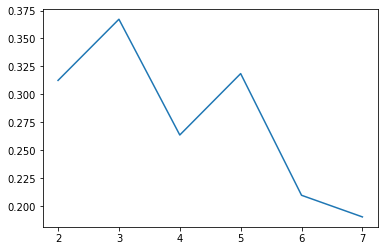

In [16]:

df[20]['low']['stdev'].plot()